In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('players.csv')
df

,player,country,team,rounds,rating,ACS,K/D,ADR,KPR,DPR,APR,FBPR,FDPR,HS%,FBSR%
0,conir,cl,KRÜ Fem,540,1.62,316.6,2.00,206.4,1.12,0.56,0.33,0.19,0.08,23%,70%
1,FRAZPEEK,cl,King's Row,318,1.56,321.9,1.59,195.9,1.10,0.69,0.18,0.28,0.16,28%,63%
2,Unravel,ru,Smile,344,1.46,310.4,1.53,188.8,1.10,0.72,0.13,0.22,0.13,27%,63%
3,eneri,id,Celeste,1392,1.46,298.2,1.43,184.9,1.02,0.71,0.27,0.25,0.14,23%,64%
4,aspas,br,LOUD,587,1.45,286.5,1.80,182.9,1.01,0.56,0.23,0.21,0.11,24%,67%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3782,aru,ca,Trash Pandas,495,0.58,142.3,0.51,100.7,0.42,0.83,0.26,0.06,0.08,19%,43%
3783,Ender,br,Artemis,544,0.58,135.4,0.57,91.8,0.47,0.82,0.18,0.02,0.08,18%,21%
3784,ronnie,gb,TEAMMATES,466,0.58,133.5,0.63,92.8,0.50,0.79,0.15,0.05,0.09,27%,38%
3785,Yaza,ca,Stanky Bois,540,0.58,131.2,0.55,90.2,0.46,0.83,0.13,0.06,0.09,21%,37%


In [3]:
features = ['ACS','K/D','ADR','KPR','DPR','HS%','APR']
df = df[features]

In [4]:
df.isnull().sum()

ACS    0
K/D    0
ADR    0
KPR    0
DPR    0
HS%    0
APR    0
dtype: int64

In [5]:
df.shape

(3787, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3787 entries, 0 to 3786
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ACS     3787 non-null   float64
 1   K/D     3787 non-null   float64
 2   ADR     3787 non-null   float64
 3   KPR     3787 non-null   float64
 4   DPR     3787 non-null   float64
 5   HS%     3787 non-null   object 
 6   APR     3787 non-null   float64
dtypes: float64(6), object(1)
memory usage: 207.2+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ACS,3787.0,204.975918,28.483427,126.30,185.65,202.20,223.30,321.90
K/D,3787.0,1.036699,0.170763,0.51,0.93,1.03,1.14,2.00
ADR,3787.0,135.116002,16.836871,81.60,123.60,134.10,146.00,206.40
KPR,3787.0,0.718191,0.101585,0.41,0.65,0.71,0.78,1.12
DPR,3787.0,0.697608,0.054620,0.49,0.66,0.70,0.73,0.90
APR,3787.0,0.265078,0.075285,0.07,0.20,0.27,0.32,0.53


In [8]:
# df.drop(['Unnamed: 0', 'Agent Name', 'Win Rate', 'Pick Rate', 'Num Matches', 'tier', 'map'], axis=1, inplace=True)
df

,ACS,K/D,ADR,KPR,DPR,HS%,APR
0,316.6,2.00,206.4,1.12,0.56,23%,0.33
1,321.9,1.59,195.9,1.10,0.69,28%,0.18
2,310.4,1.53,188.8,1.10,0.72,27%,0.13
3,298.2,1.43,184.9,1.02,0.71,23%,0.27
4,286.5,1.80,182.9,1.01,0.56,24%,0.23
...,...,...,...,...,...,...,...
3782,142.3,0.51,100.7,0.42,0.83,19%,0.26
3783,135.4,0.57,91.8,0.47,0.82,18%,0.18
3784,133.5,0.63,92.8,0.50,0.79,27%,0.15
3785,131.2,0.55,90.2,0.46,0.83,21%,0.13


In [9]:
df['HS%'] = df['HS%'].str.rstrip('%').astype('float') / 100.0
df

C:\Users\Alif\AppData\Local\Temp\ipykernel_12064\1417839189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HS%'] = df['HS%'].str.rstrip('%').astype('float') / 100.0


,ACS,K/D,ADR,KPR,DPR,HS%,APR
0,316.6,2.00,206.4,1.12,0.56,0.23,0.33
1,321.9,1.59,195.9,1.10,0.69,0.28,0.18
2,310.4,1.53,188.8,1.10,0.72,0.27,0.13
3,298.2,1.43,184.9,1.02,0.71,0.23,0.27
4,286.5,1.80,182.9,1.01,0.56,0.24,0.23
...,...,...,...,...,...,...,...
3782,142.3,0.51,100.7,0.42,0.83,0.19,0.26
3783,135.4,0.57,91.8,0.47,0.82,0.18,0.18
3784,133.5,0.63,92.8,0.50,0.79,0.27,0.15
3785,131.2,0.55,90.2,0.46,0.83,0.21,0.13


In [10]:
df.rename(columns={'ACS': 'Average Combat Score', 'K/D': 'Kill/Death Ratio', 'ADR': 'Average Damage per Round', 'KPR': 'Kill per Round', 'DPR': 'Death per Round', 'HS%': 'Headshot Percentage', 'APR': 'Assist per Round'}, inplace=True)

C:\Users\Alif\AppData\Local\Temp\ipykernel_12064\661264776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'ACS': 'Average Combat Score', 'K/D': 'Kill/Death Ratio', 'ADR': 'Average Damage per Round', 'KPR': 'Kill per Round', 'DPR': 'Death per Round', 'HS%': 'Headshot Percentage', 'APR': 'Assist per Round'}, inplace=True)


In [11]:
df

,Average Combat Score,Kill/Death Ratio,Average Damage per Round,Kill per Round,Death per Round,Headshot Percentage,Assist per Round
0,316.6,2.00,206.4,1.12,0.56,0.23,0.33
1,321.9,1.59,195.9,1.10,0.69,0.28,0.18
2,310.4,1.53,188.8,1.10,0.72,0.27,0.13
3,298.2,1.43,184.9,1.02,0.71,0.23,0.27
4,286.5,1.80,182.9,1.01,0.56,0.24,0.23
...,...,...,...,...,...,...,...
3782,142.3,0.51,100.7,0.42,0.83,0.19,0.26
3783,135.4,0.57,91.8,0.47,0.82,0.18,0.18
3784,133.5,0.63,92.8,0.50,0.79,0.27,0.15
3785,131.2,0.55,90.2,0.46,0.83,0.21,0.13


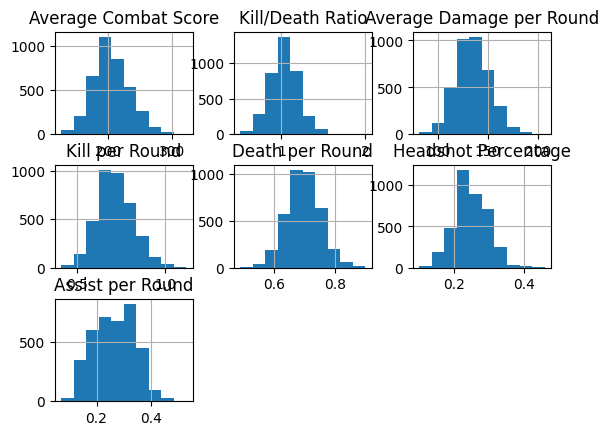

In [12]:
df.hist()
plt.show()

<AxesSubplot: xlabel='Assist per Round', ylabel='Count'>

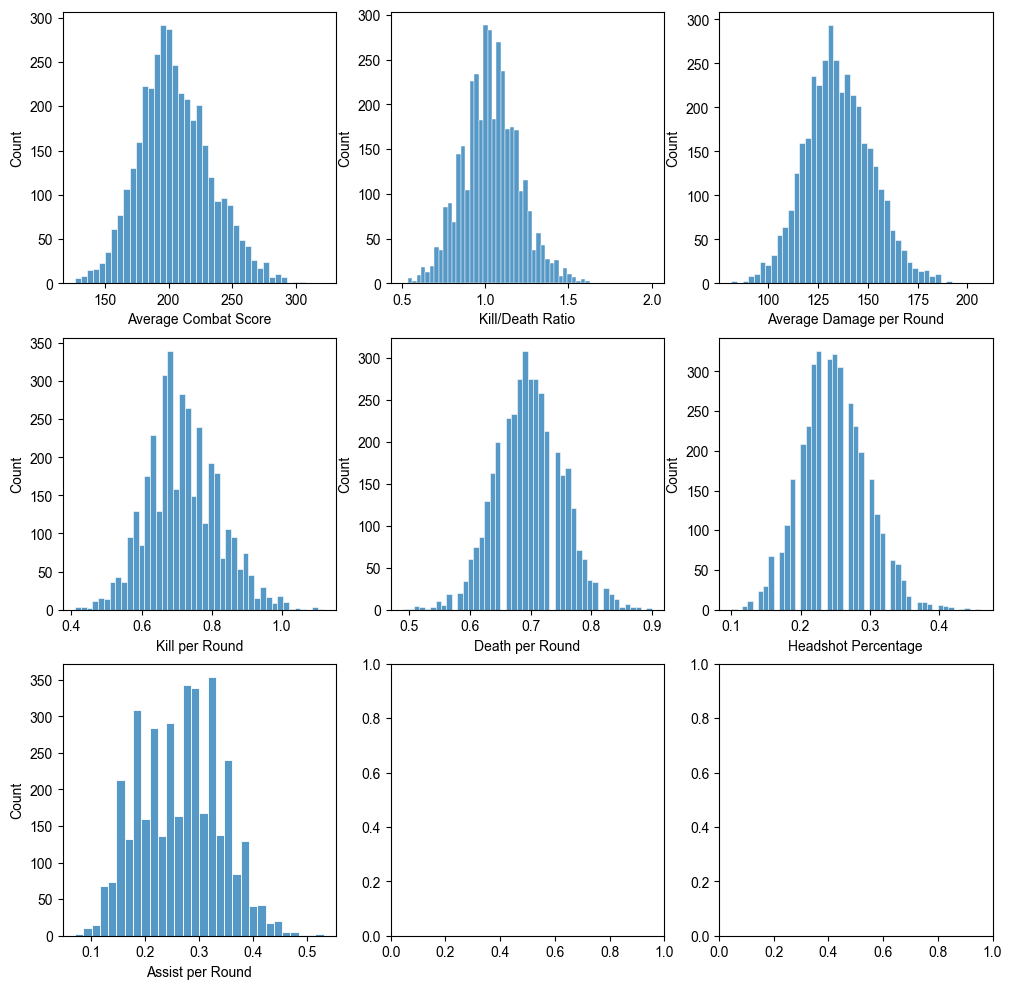

In [13]:
fig, ax = plt.subplots(3,3, figsize=(12,12))
sns.set_style('whitegrid')
sns.set_palette('autumn')
sns.histplot(data=df, ax=ax[0,0], x='Average Combat Score')
sns.histplot(data=df, ax=ax[0,1], x='Kill/Death Ratio')
sns.histplot(data=df, ax=ax[0,2], x='Average Damage per Round')
sns.histplot(data=df, ax=ax[1,0], x='Kill per Round')
sns.histplot(data=df, ax=ax[1,1], x='Death per Round')
sns.histplot(data=df, ax=ax[1,2], x='Headshot Percentage')
sns.histplot(data=df, ax=ax[2,0], x='Assist per Round')



<AxesSubplot: >

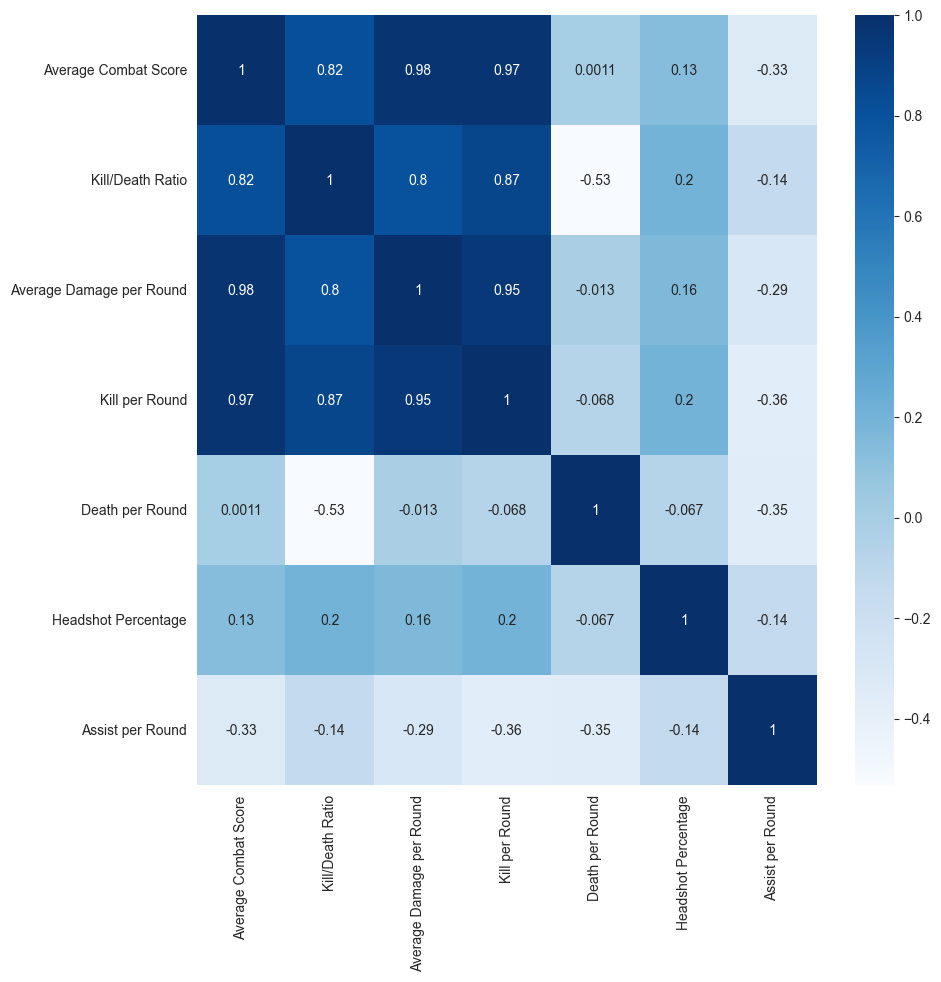

In [14]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='Blues')

<AxesSubplot: xlabel='Kill/Death Ratio', ylabel='Average Combat Score'>

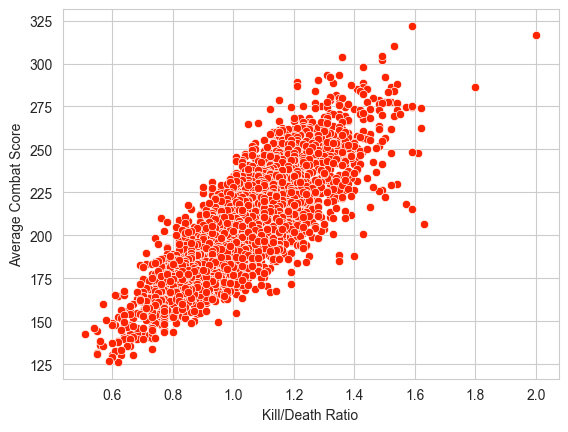

In [15]:
sns.scatterplot(data=df, x='Kill/Death Ratio', y='Average Combat Score')

<AxesSubplot: xlabel='Assist per Round', ylabel='Average Combat Score'>

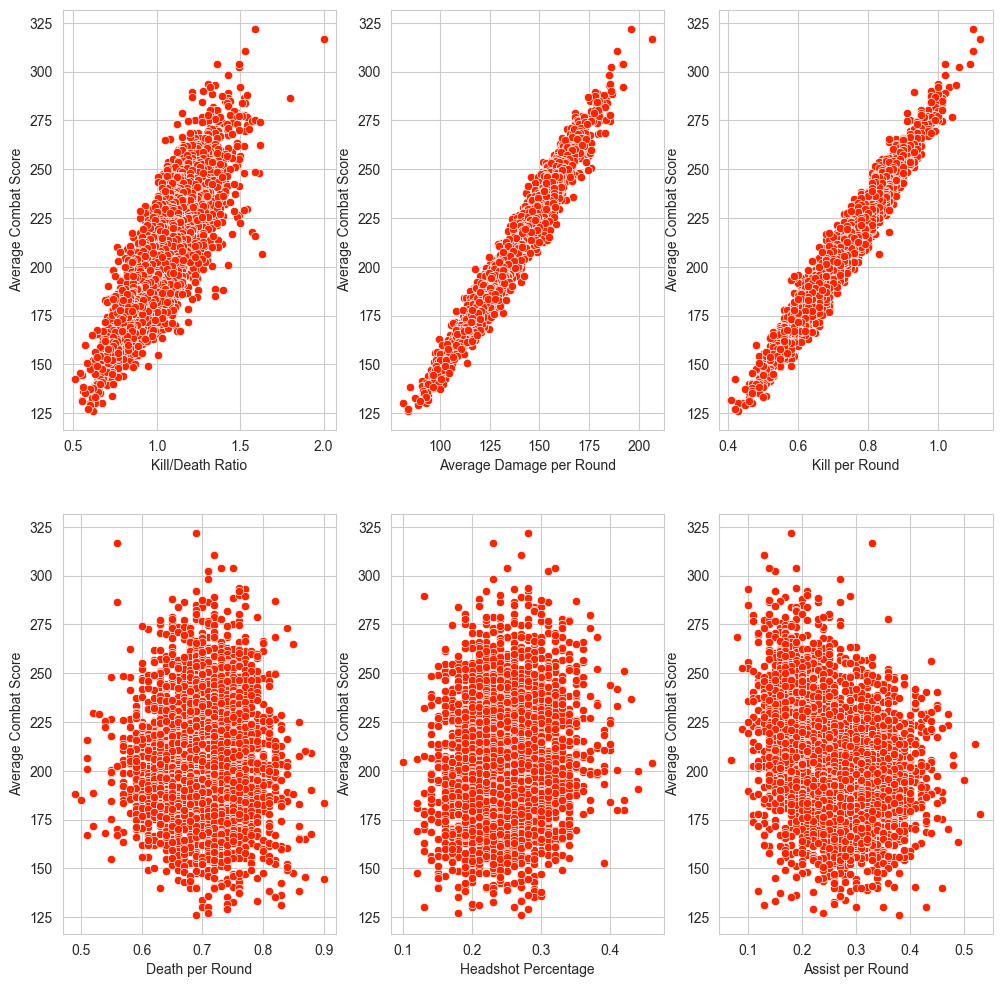

In [16]:
fig, ax = plt.subplots(2,3, figsize=(12,12))
sns.set_style('whitegrid')
sns.set_palette('autumn')
sns.scatterplot(data=df, ax=ax[0,0], y='Average Combat Score', x='Kill/Death Ratio')
sns.scatterplot(data=df, ax=ax[0,1], y='Average Combat Score', x='Average Damage per Round')
sns.scatterplot(data=df, ax=ax[0,2], y='Average Combat Score', x='Kill per Round')
sns.scatterplot(data=df, ax=ax[1,0], y='Average Combat Score', x='Death per Round')
sns.scatterplot(data=df, ax=ax[1,1], y='Average Combat Score', x='Headshot Percentage')
sns.scatterplot(data=df, ax=ax[1,2], y='Average Combat Score', x='Assist per Round')

In [17]:
x = df.drop('Average Combat Score', axis=1)
y = df['Average Combat Score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3029, 6), (758, 6), (3029,), (758,))

In [18]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)

print('R2 Score: ', r2_score(y_test, y_pred))
print('Coefficient: ', lm.coef_)
print('Intercept: ', lm.intercept_)
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Accuracy: {0:.0%}'.format( lm.score(x_test, y_test)) )

R2 Score:  0.9830498828889932
Coefficient:  [-10.15882731   0.76699807 173.34403301  10.04897042 -31.50731868
   8.93448015]
Intercept:  -14.21010647026705
Mean Squared Error:  14.39877258805352
Mean Absolute Error:  2.942548782605675
Accuracy: 98%


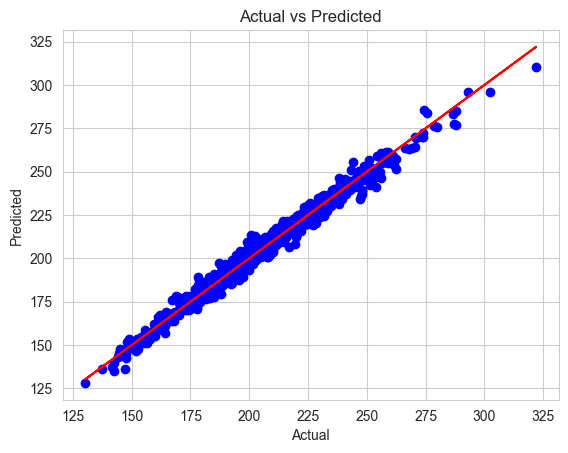

In [19]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [25]:
# Predict the ACS of a player with the following stats:
Kd = float(input('Enter the K/D: '))
Adr = float(input('Enter the Average Damage per Round: '))
Kpr = float(input('Enter the Kill per Round: '))
Dpr = float(input('Enter the Death per Round: '))
Hs = float(input('Enter the Headshot Percentage: '))
Apr = float(input('Enter the Assist per Round: '))

print('Predicted Value : %2.2f' % lm.predict([[Kd, Adr, Kpr, Dpr, Hs, Apr]]))


Predicted Value : 135.33


c:\Users\Alif\AppData\Local\pypoetry\Cache\virtualenvs\probstat-linear-regression-sHmJ1F59-py3.11\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
